In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.offline as py
import plotly.figure_factory as ff
from IPython.display import HTML, display
from IPython.core import display as ICD
from plotly.offline import init_notebook_mode, iplot
import matplotlib as mpl
from sklearn.cluster import KMeans
from statsmodels import robust
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler


In [ ]:
red_wine_data = pd.read_csv('winequality-red.csv', delimiter=',' )

In [ ]:
white_wine_data = pd.read_csv('winequality-white.csv', delimiter=',' )

In [ ]:
red_wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
white_wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [ ]:
white_wine_data [ "quality"].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [ ]:
white_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
red_wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
white_wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
red_wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
white_wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [ ]:
data_head = red_wine_data.describe()
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]
df_table = ff.create_table(round(data_head.iloc[:,[0,1,2,3,4,5]], 5), colorscale=colorscale)
py.iplot(df_table, filename='red_wine_data.csv')
df_table = ff.create_table(round(data_head.iloc[:,[6,7,8,9,10,11]],1), colorscale=colorscale)
py.iplot(df_table, filename='red_wine_data.csv')

In [ ]:
data_head = white_wine_data.describe()
colorscale = [[0, '#7BAA3E'],[.5, '#F0DFD6'],[1, '#E6D1BC']]
df_table = ff.create_table(round(data_head.iloc[:,[0,1,2,3,4,5]], 3), colorscale=colorscale)
py.iplot(df_table, filename='white_wine_data.csv')
df_table = ff.create_table(round(data_head.iloc[:,[6,7,8,9,10,11]], 3), colorscale=colorscale)
py.iplot(df_table, filename='white_wine_data.csv')

In [ ]:
white_wine_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']].apply(robust.mad)


fixed acidity            0.741301
volatile acidity         0.088956
citric acid              0.088956
residual sugar           5.337368
chlorides                0.010378
free sulfur dioxide     16.308624
total sulfur dioxide    42.995464
density                  0.003173
pH                       0.148260
sulphates                0.103782
alcohol                  1.482602
quality                  1.482602
dtype: float64

In [ ]:
red_wine_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']].apply(robust.mad)

fixed acidity            1.482602
volatile acidity         0.177912
citric acid              0.252042
residual sugar           0.444781
chlorides                0.014826
free sulfur dioxide     10.378216
total sulfur dioxide    26.686840
density                  0.001675
pH                       0.148260
sulphates                0.118608
alcohol                  1.037822
quality                  1.482602
dtype: float64

In [ ]:

cols = ['quality', 'free sulfur dioxide', 'total sulfur dioxide', 'residual sugar', 'fixed acidity', 'alcohol']
data = red_wine_data[cols]


for col in cols:
    stat, p = shapiro(data[col])
    print(f'{col}:')
    print('Shapiro-Wilk test statistic:', stat)
    print('p-value:', p)
    if p > 0.05:
        print('The data is likely normally distributed')
    else:
        print('The data is likely not normally distributed')

quality:
Shapiro-Wilk test statistic: 0.8575895017309976
p-value: 9.515084999430088e-36
The data is likely not normally distributed
free sulfur dioxide:
Shapiro-Wilk test statistic: 0.9018394916138583
p-value: 7.694596687816645e-31
The data is likely not normally distributed
total sulfur dioxide:
Shapiro-Wilk test statistic: 0.8732245604736051
p-value: 3.5734514102654424e-34
The data is likely not normally distributed
residual sugar:
Shapiro-Wilk test statistic: 0.5660771057163958
p-value: 1.0201616453237868e-52
The data is likely not normally distributed
fixed acidity:
Shapiro-Wilk test statistic: 0.9420297903867135
p-value: 1.525011710791387e-24
The data is likely not normally distributed
alcohol:
Shapiro-Wilk test statistic: 0.9288390813054377
p-value: 6.644056905730039e-27
The data is likely not normally distributed


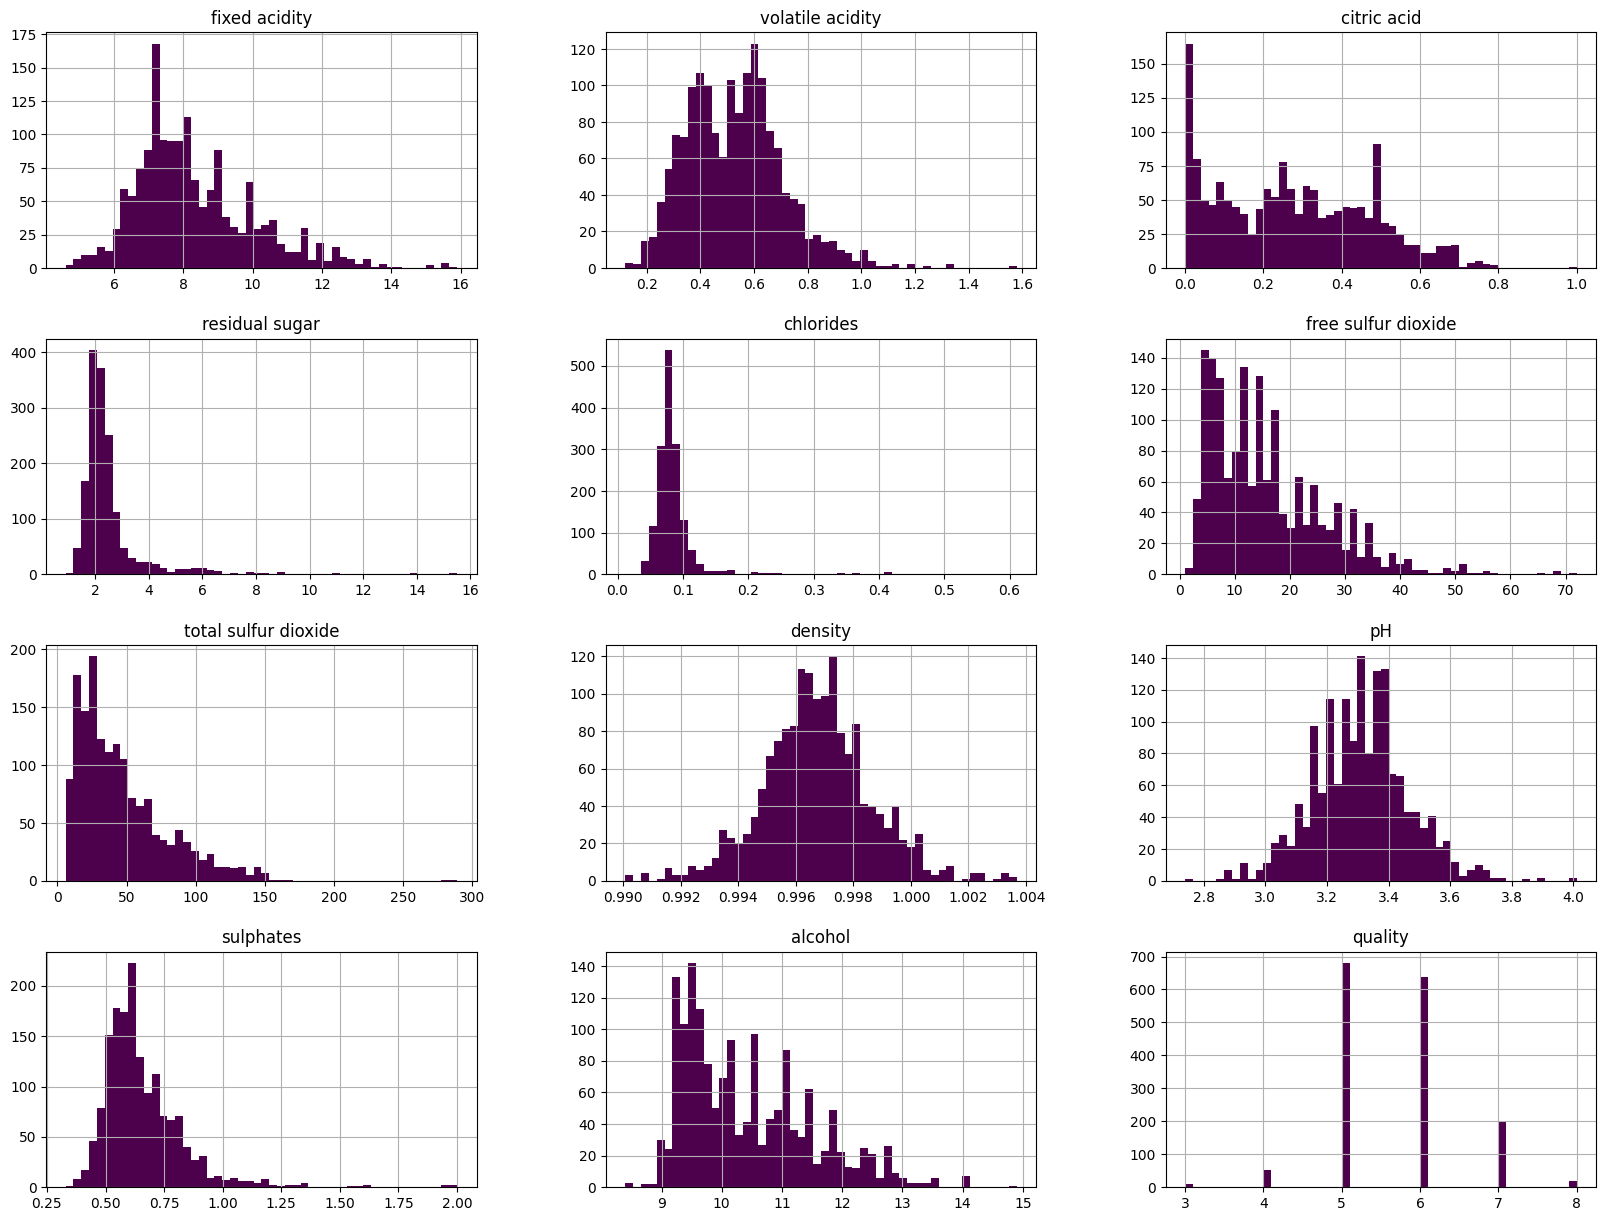

In [ ]:
red_wine_data.hist(bins=50,figsize=(20,15),color = "#4d004c")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

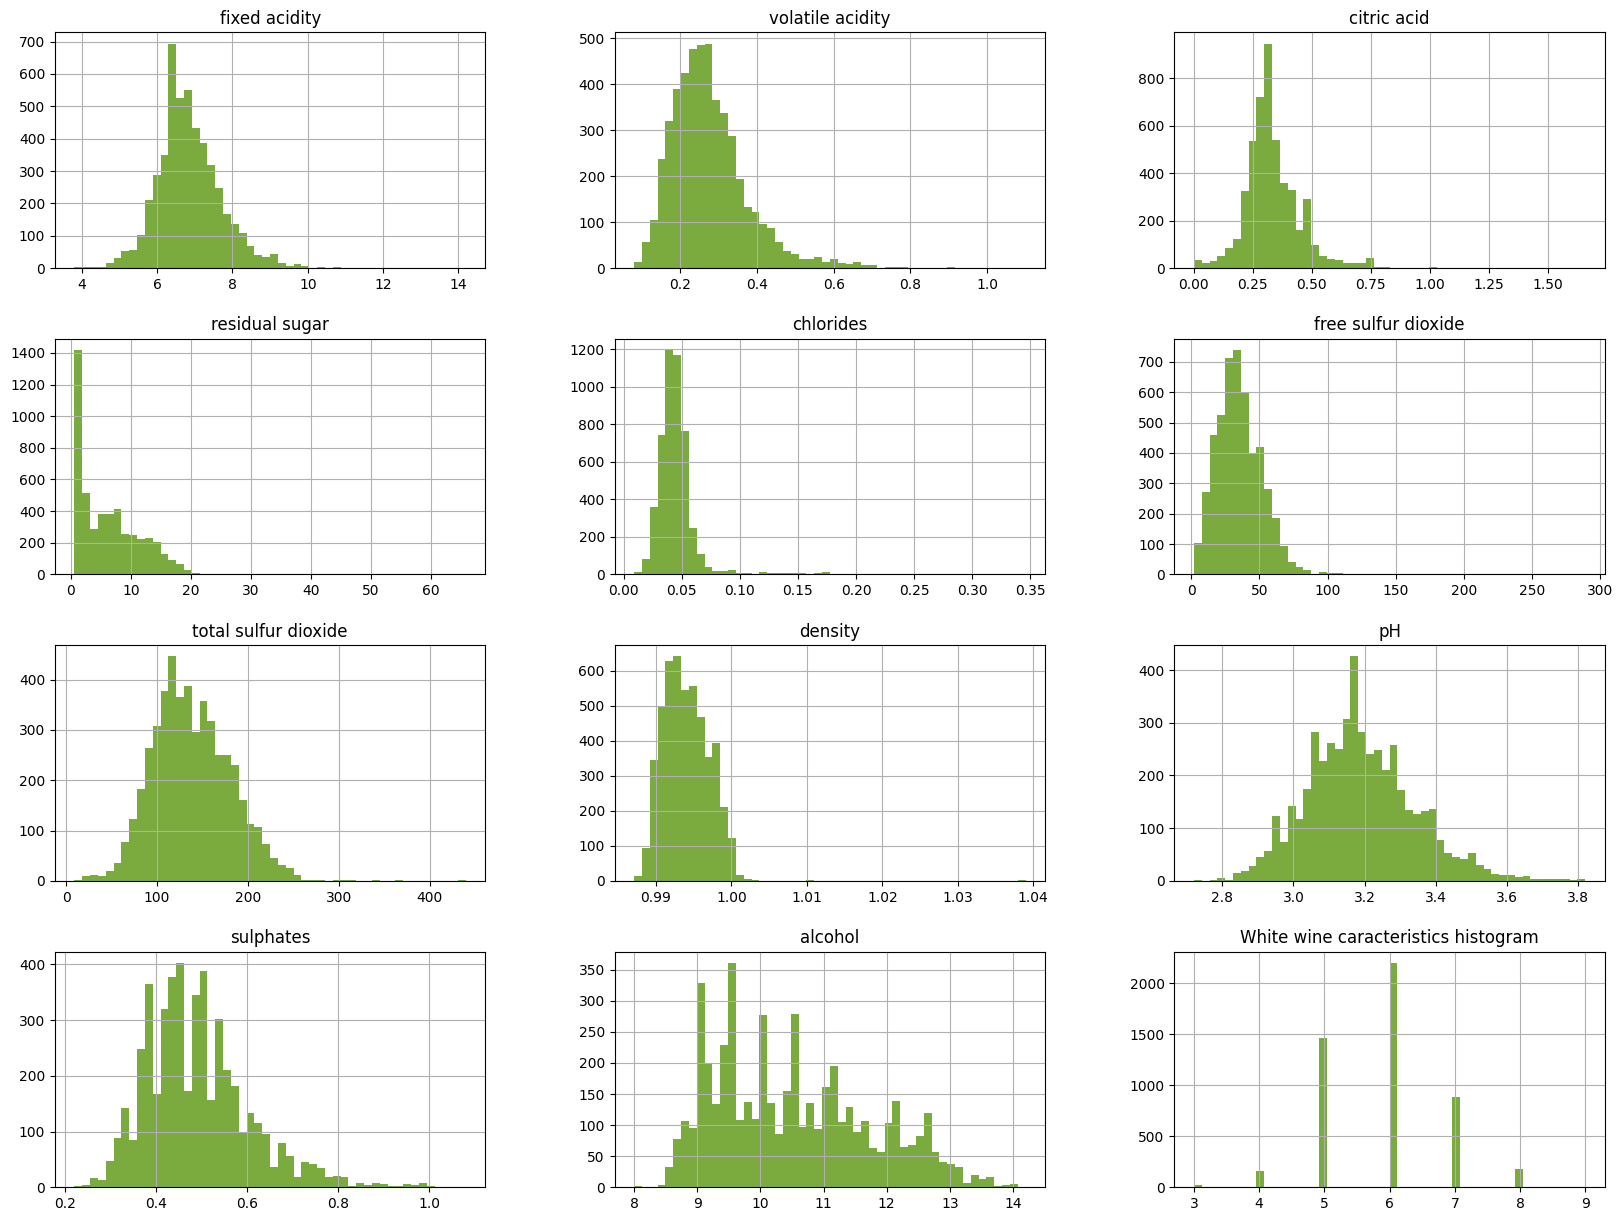

In [ ]:
white_wine_data.hist(bins=50,figsize=(20,15),color='#7BAA3E')

plt.title('White wine caracteristics histogram')

plt.show

[Text(0.5, 1.0, 'Caracteristics white wine')]

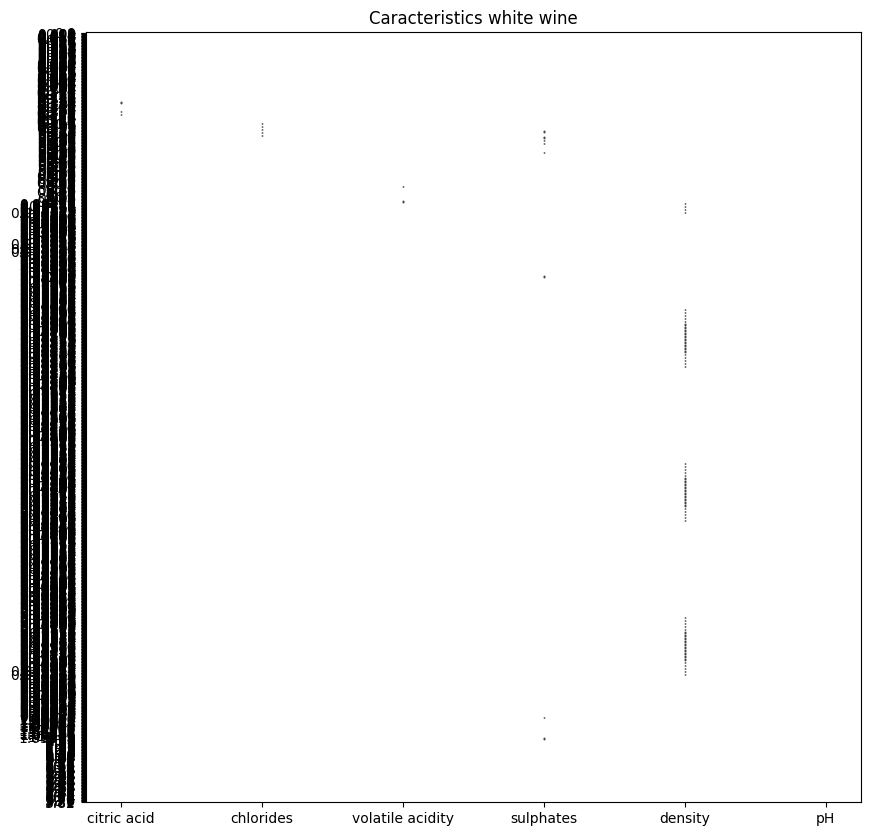

In [ ]:
#wHITE WINE caracteristics boxplots
plt.figure(figsize=(10,10))
# add title using suptitle

sns.boxplot(data=white_wine_data.drop(columns=['quality','free sulfur dioxide','total sulfur dioxide', 'residual sugar','fixed acidity','alcohol']), orient='horizontal', palette='husl').set(title='Caracteristics white wine')

[Text(0.5, 1.0, 'Caracteristics red wine')]

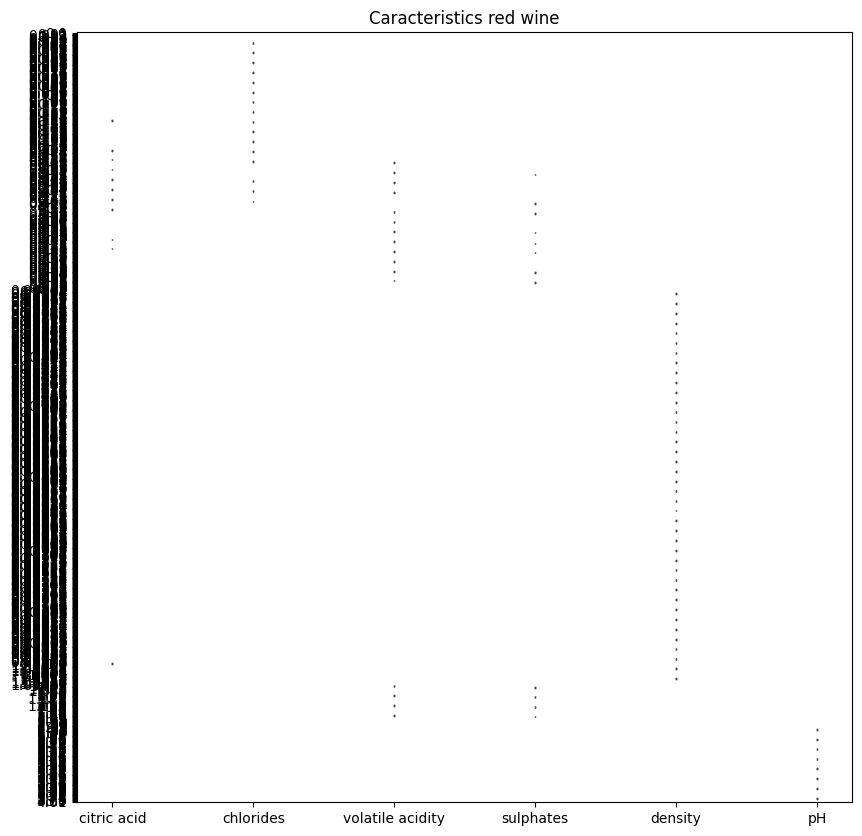

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=red_wine_data.drop(columns=['quality','free sulfur dioxide','total sulfur dioxide', 'residual sugar','fixed acidity','alcohol']), orient='horizontal', palette='husl').set(title='Caracteristics red wine')

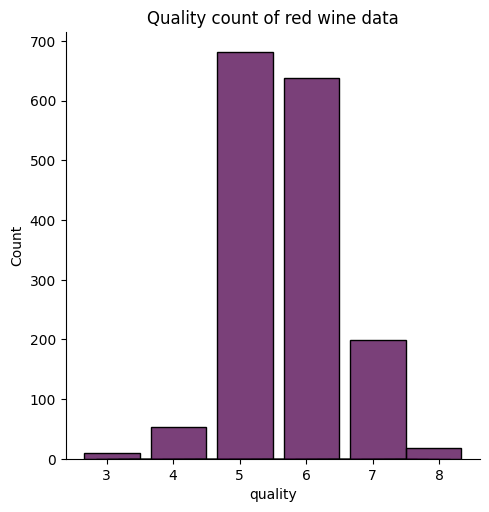

In [ ]:
sns.displot(red_wine_data, x="quality",shrink=5,color = "#4d004c").set(title='Quality count of red wine data')

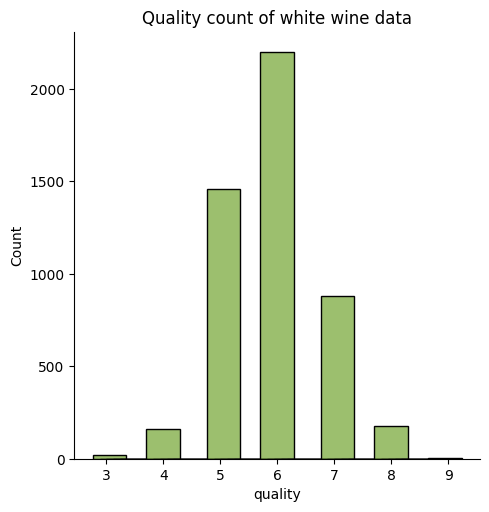

In [ ]:
sns.displot(white_wine_data, x="quality",shrink=5,color = '#7BAA3E').set(title='Quality count of white wine data')

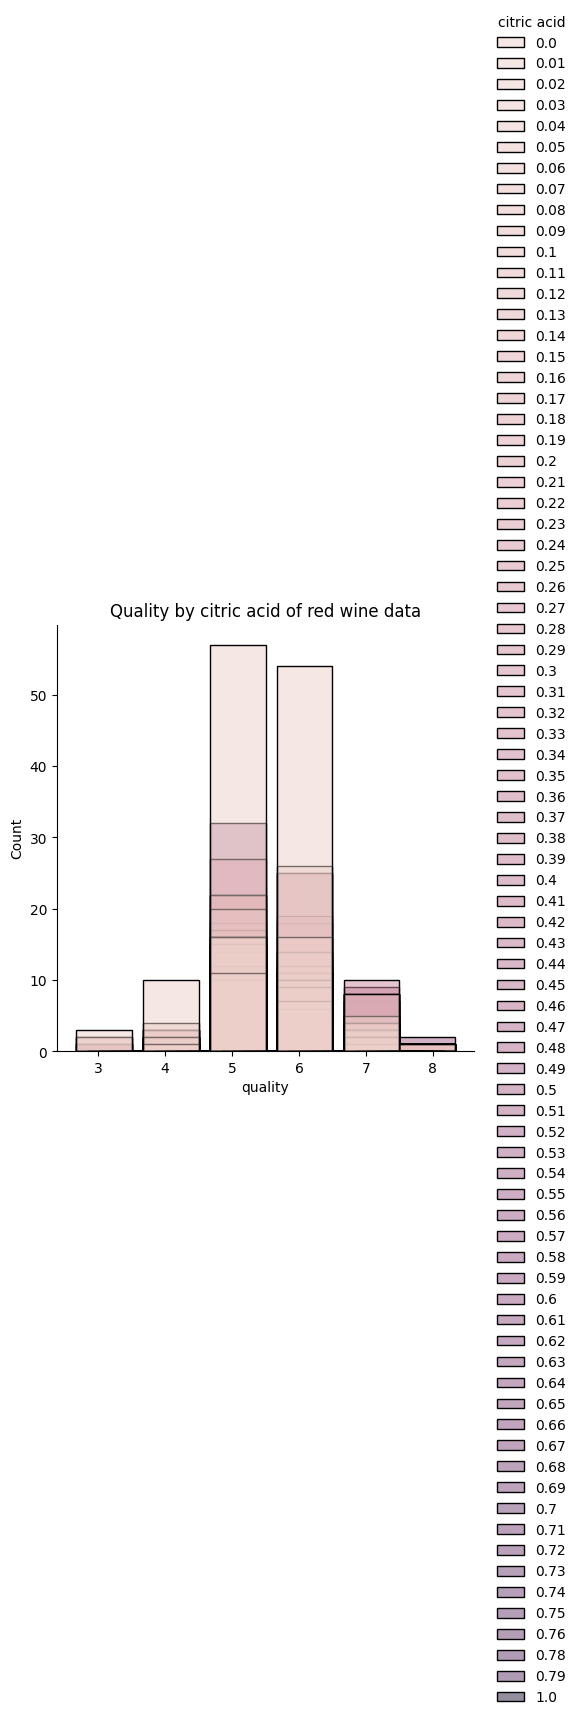

In [ ]:
sns.displot(red_wine_data, x="quality",shrink=5,hue='citric acid').set(title='Quality by citric acid of red wine data')

In [ ]:
corr_matrix_white = white_wine_data.corr()
corr_matrix_white["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix Heatmap white wine')

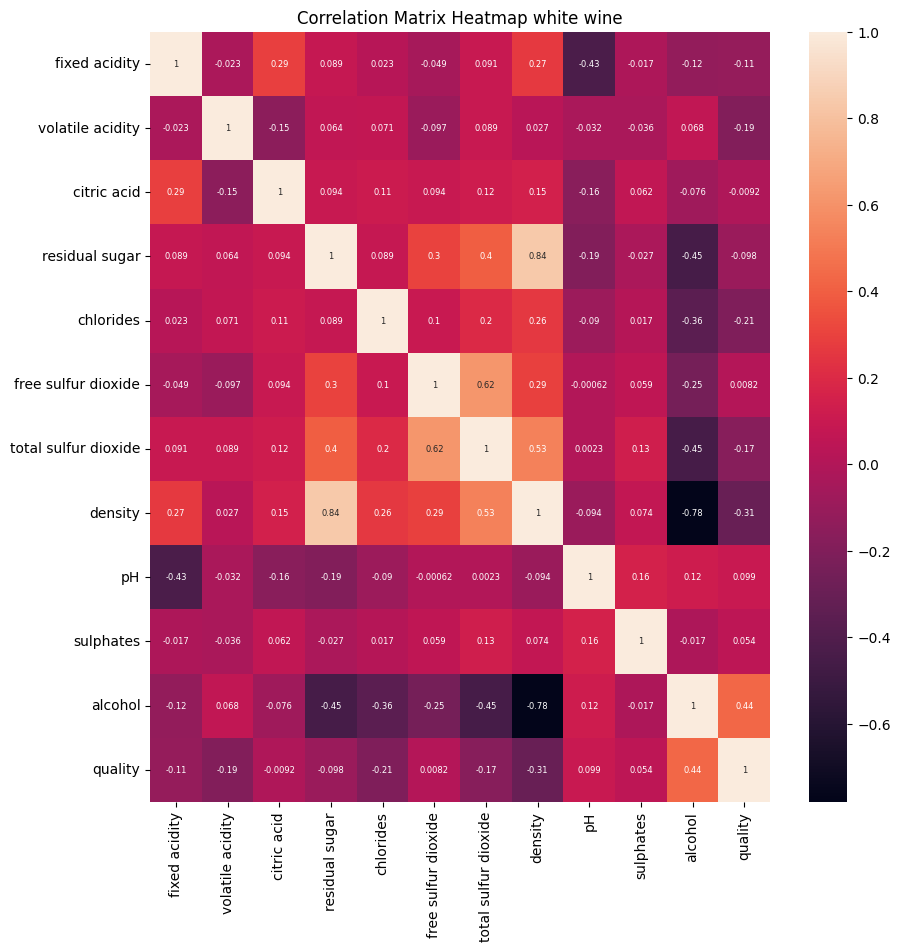

In [ ]:
plt.figure(figsize=(10,10)) #to increase the size of the figure
sns.heatmap(corr_matrix_white, annot=True, annot_kws={'size': 6})
plt.title("Correlation Matrix Heatmap white wine", loc="center")

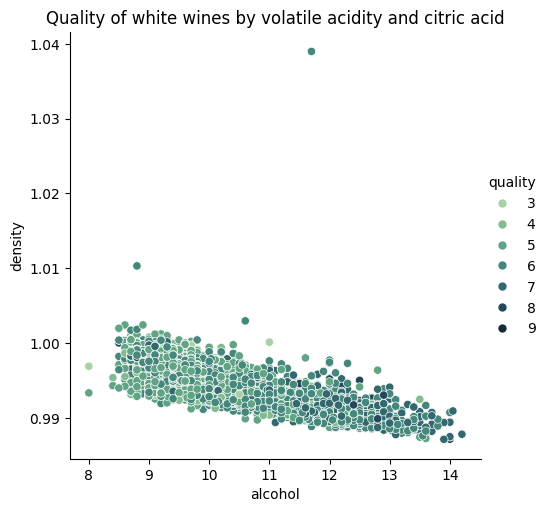

In [ ]:
sns.relplot(
    data=white_wine_data,
    x="alcohol", y="density",
    hue="quality", palette="ch:r=-.5,l=.75"
).set(title='Quality of white wines by volatile acidity and citric acid')

Text(0.5, 1.0, 'Correlation Matrix Heatmap Red wine')

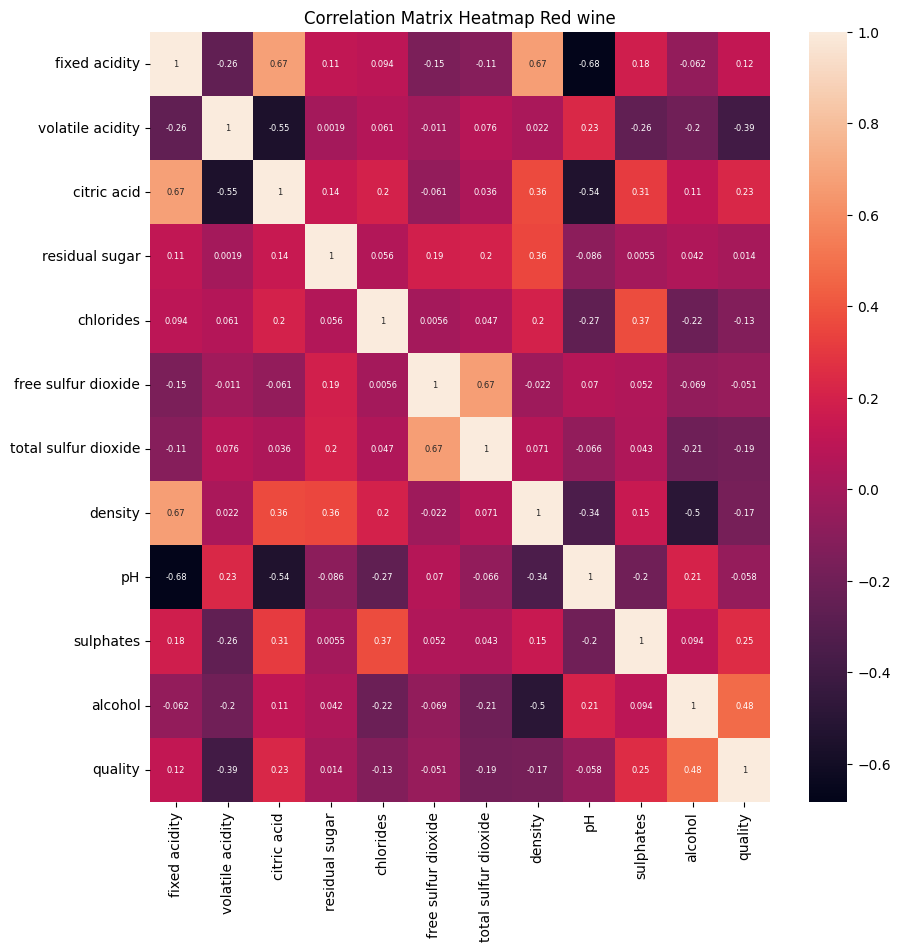

In [ ]:
corr_matrix_red = red_wine_data.corr()
plt.figure(figsize=(10,10)) #to increase the size of the figure
sns.heatmap(corr_matrix_red, annot=True, annot_kws={'size': 6})
plt.title("Correlation Matrix Heatmap Red wine", loc="center")

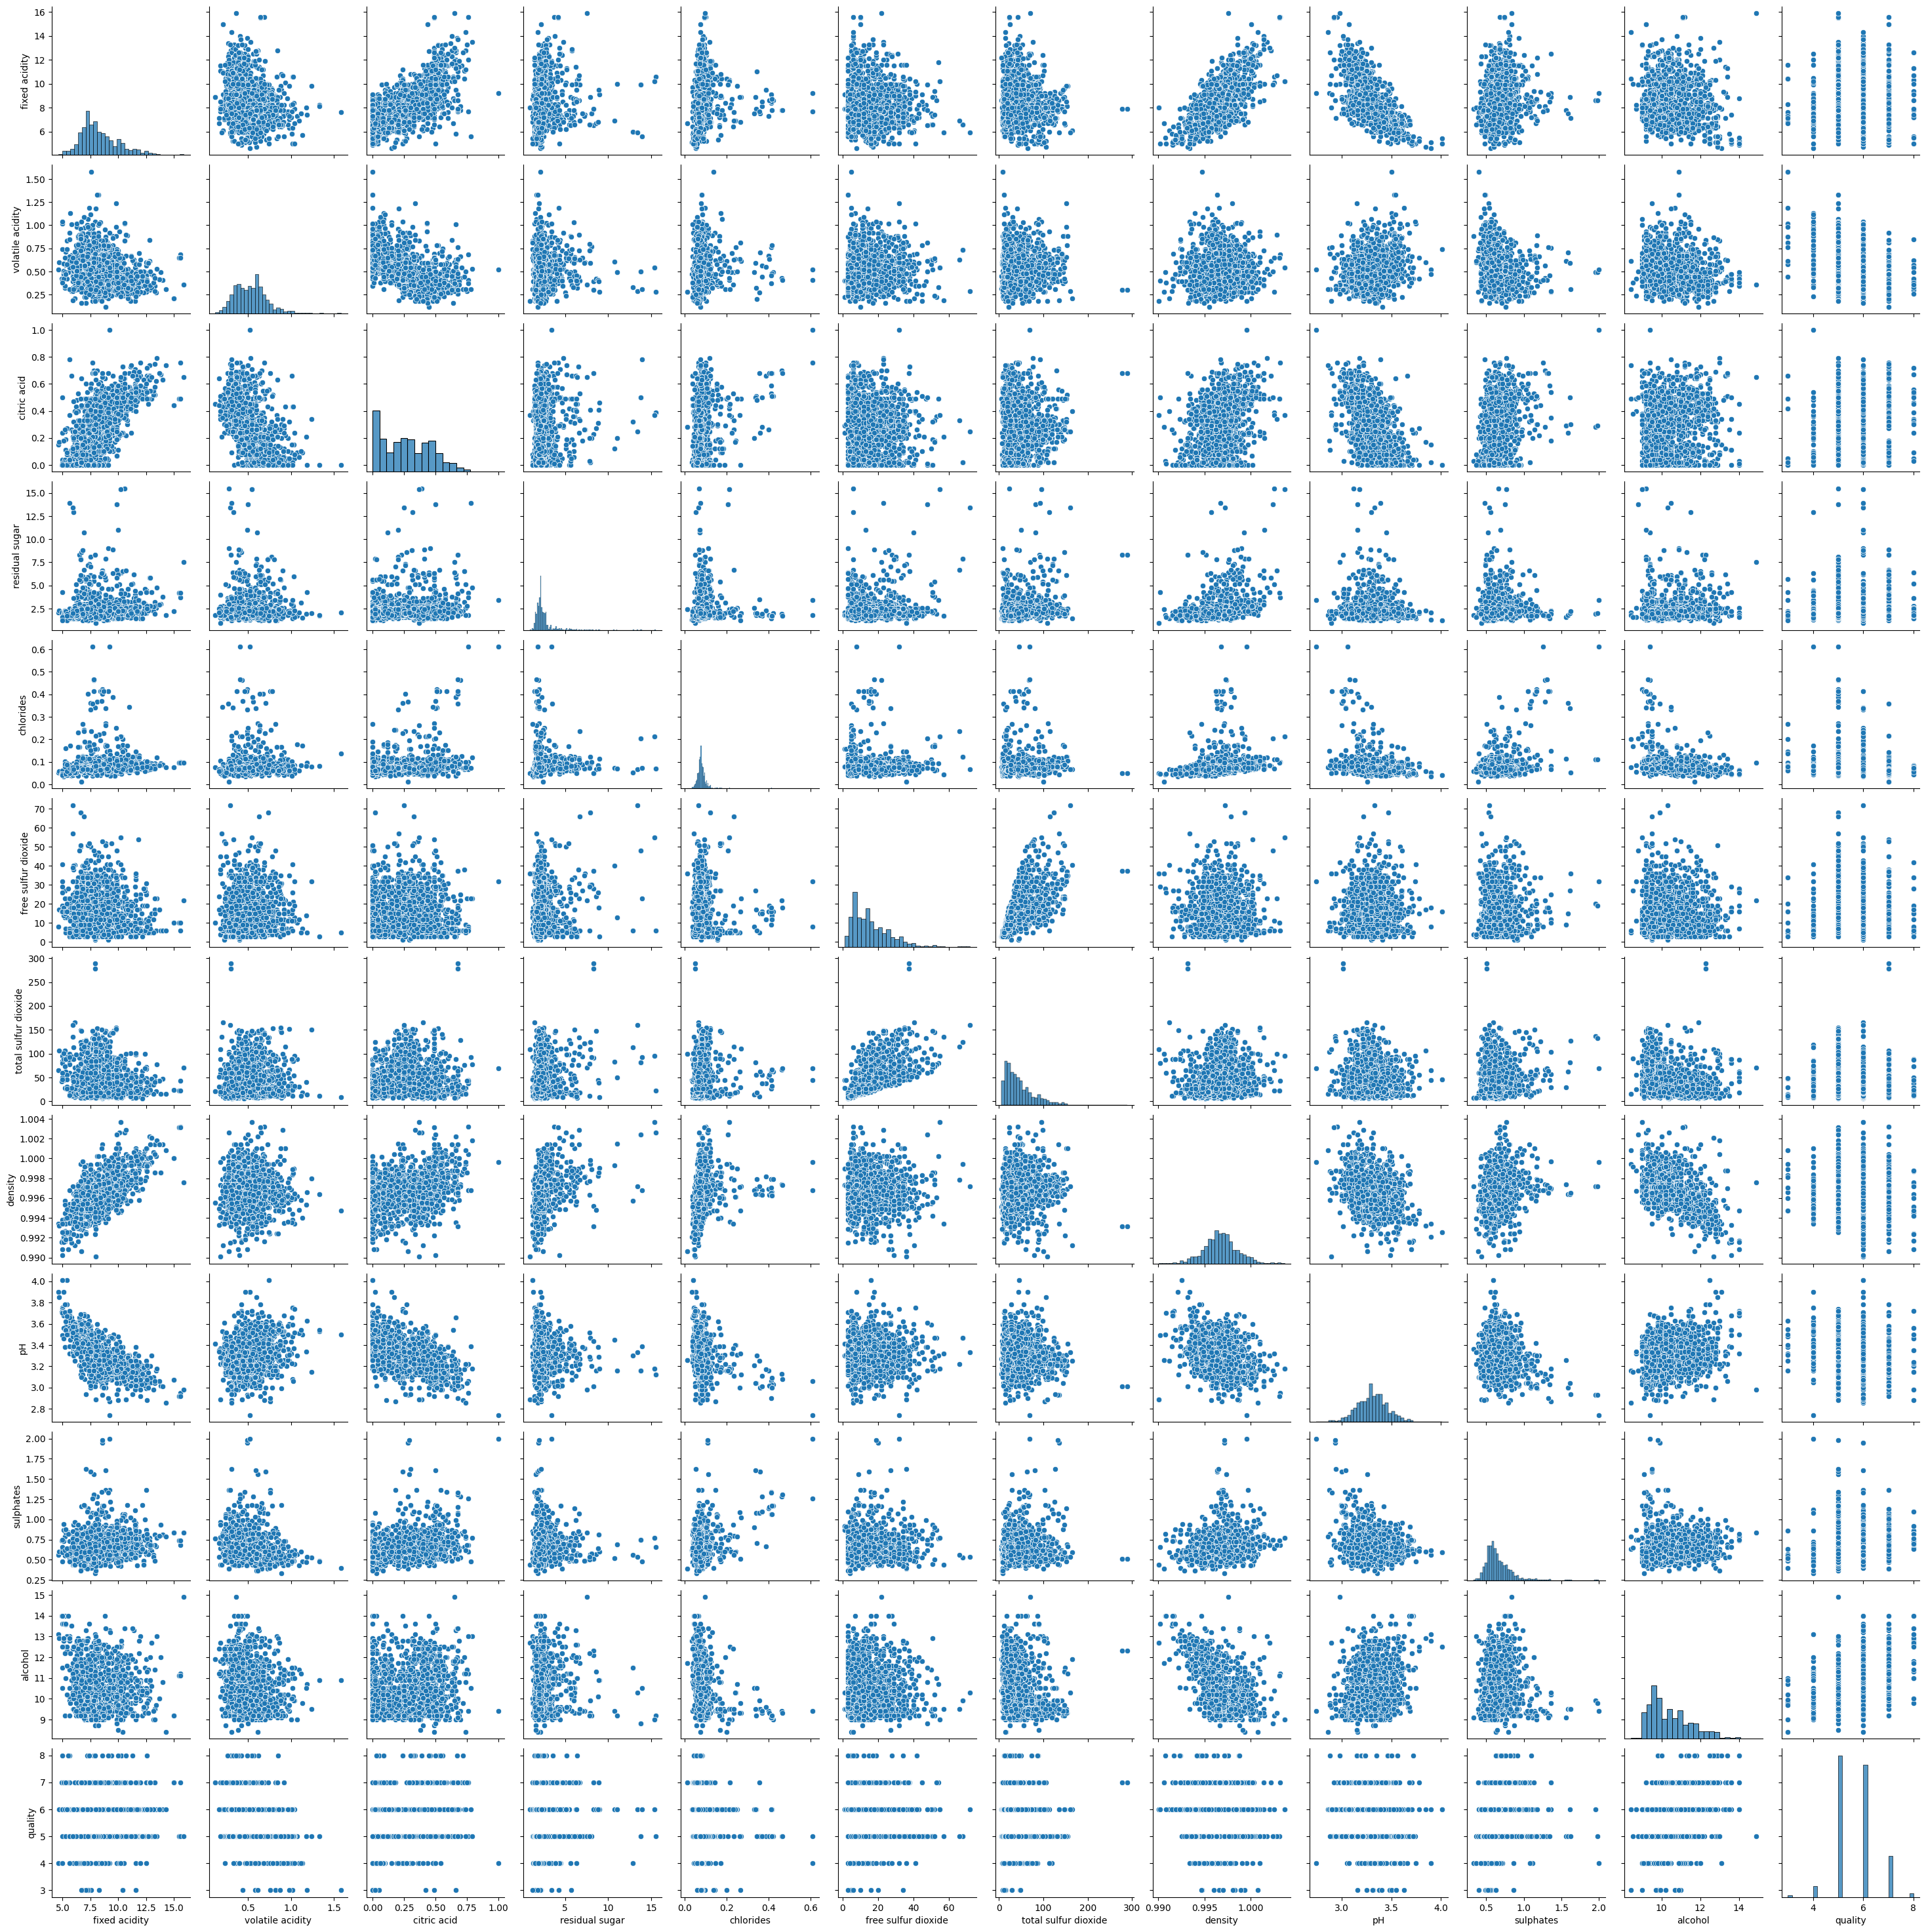

In [ ]:
sns.pairplot(red_wine_data)
plt.show()

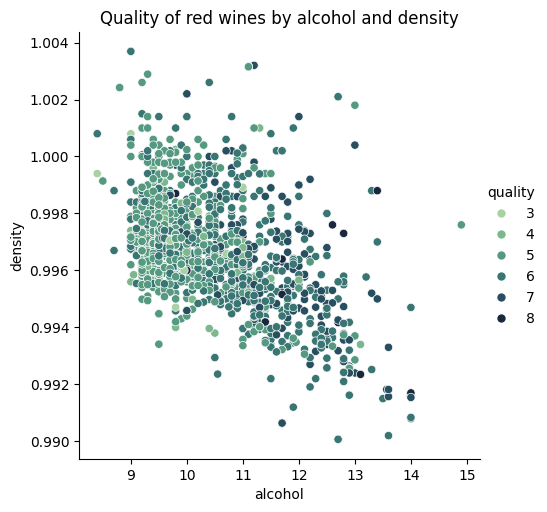

In [ ]:
sns.relplot(
    data=red_wine_data,
    x="alcohol", y="density",
    hue="quality", palette="ch:r=-.5,l=.75"
).set(title='Quality of red wines by alcohol and density')

In [ ]:
#red_wine_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'
#]] = red_wine_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']].apply(np.log)

In [ ]:
#white_wine_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'
#]] = white_wine_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']].apply(np.log)

In [ ]:
##the winsorization did not work because this assume it was done in numpy when our data is in pandas, so you have to understand how is your data type to then
# choose the right code to use

data = red_wine_data

clip_percent = 5
clip_min = np.percentile(data, clip_percent)
clip_max = np.percentile(data, 100 - clip_percent)

# apply Winsorization to the data
#data_winsorized = winsorize(data, (clip_percent, 100 - clip_percent))

In [ ]:
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [ ]:
print(type(red_wine_data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
##the winsorization for red wine data with high variability
# specify the percentage of values to clip (e.g. 5% from both ends)
clip_percent = 5

# convert clip percent to fraction
clip_fraction = clip_percent / 100

# apply Winsorization to the columns
for col in ['fixed acidity', 'alcohol', 'free sulfur dioxide', 'total sulfur dioxide','quality']:
    clip_min = np.percentile(red_wine_data[col], clip_percent)
    clip_max = np.percentile(red_wine_data[col], 100 - clip_percent)
    red_wine_data[col] = winsorize(red_wine_data[col], (clip_fraction, clip_fraction))

In [ ]:
##the winsorization for white wine data with high variability
# specify the percentage of values to clip (e.g. 5% from both ends)
clip_percent = 5

# convert clip percent to fraction
clip_fraction = clip_percent / 100

# apply Winsorization to the columns
for col in ['residual sugar','alcohol', 'free sulfur dioxide', 'total sulfur dioxide','quality']:
    clip_min = np.percentile(white_wine_data[col], clip_percent)
    clip_max = np.percentile(white_wine_data[col], 100 - clip_percent)
    white_wine_data[col] = winsorize(white_wine_data[col], (clip_fraction, clip_fraction))

In [ ]:
#tandardization of data: first substracts the mean value and thendivides by the strandart deviation so thatresulting distribution has unit variance. Much less affected by outliers.
# create the StandardScaler object
datascalewine = data
scaler = StandardScaler()

#fit and transform the data using the scaler object
data_scaled = scaler.fit_transform(datascalewine)

In [ ]:
# Load
dataRaw = np.loadtxt('winequality-red.csv', delimiter=',', dtype='object')
header = dataRaw[0,:]
data = dataRaw[1:,:2]
data = np.vstack(data.astype(np.float32))

In [ ]:
header

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [ ]:
data

array([[7.4  , 0.7  ],
       [7.8  , 0.88 ],
       [7.8  , 0.76 ],
       ...,
       [6.3  , 0.51 ],
       [5.9  , 0.645],
       [6.   , 0.31 ]], dtype=float32)

Text(0, 0.5, 'quality')

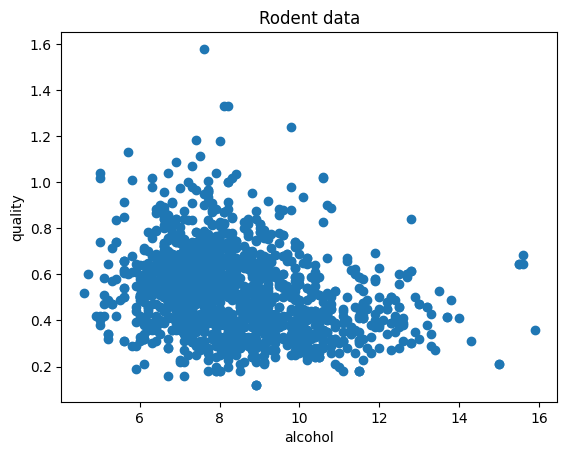

In [ ]:

fig, ax = plt.subplots()
ax.scatter(data[:,0],data[:,1])
ax.set_title('Rodent data')
ax.set_xlabel(header[10])
ax.set_ylabel(header[11])

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=15)
kmeans.fit(data)
print("WCSS: ", kmeans.inertia_)
print("Iternations until converged: ", kmeans.n_iter_)
print("Final centroids: ")
print(kmeans.cluster_centers_)
print("Cluster assignments ")
print(kmeans.labels_)

WCSS:  937.5335083007812
Iternations until converged:  5
Final centroids: 
[[ 9.016856    0.5089773 ]
 [11.6408415   0.42706573]
 [ 7.066082    0.5644289 ]]
Cluster assignments 
[2 2 2 ... 2 2 2]


Text(0, 0.5, 'volatile acidity')

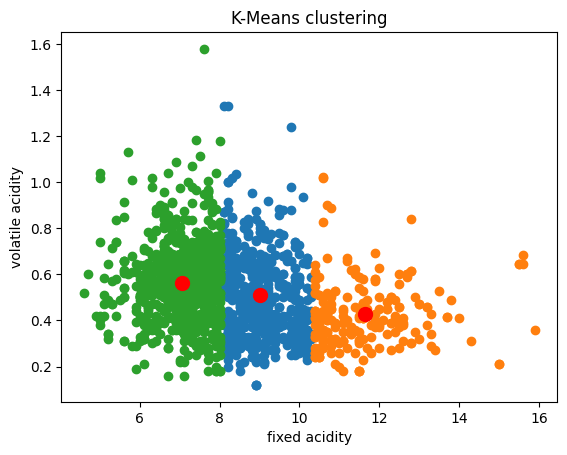

In [ ]:
fig, ax = plt.subplots()
idxs = np.unique(kmeans.labels_)

for i in idxs:
    #Points of cluster
    points = data[kmeans.labels_==i,:]
    #Plot points
    plt.scatter(points[:,0], points[:,1])
    #Plot centroids
    plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], s=100, c='red')

#Aesthetics
ax.set_title('K-Means clustering')
ax.set_xlabel(header[0])
ax.set_ylabel(header[1])

UAS DARI modeling > min.3
evaluasi > akurasi/eror/cm
deploy > laporan



In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [ ]:
# 43. Gabungkan red & white wine + beri label tipe wine
red_wine_data['type'] = 'red'
white_wine_data['type'] = 'white'

# Gabungkan dataset
wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)

# Ubah quality jadi kategori yang lebih seimbang (opsional, biar tidak terlalu imbalance)
# Kita buat 3 kelas: low (3-5), medium (6), high (7-9)
def quality_category(q):
    if q <= 5:
        return 'low'
    elif q == 6:
        return 'medium'
    else:
        return 'high'

wine_data['quality_label'] = wine_data['quality'].apply(quality_category)

In [ ]:
wine_data = pd.get_dummies(wine_data, columns=['type'], drop_first=True)  # type_white: 1=white, 0=red

In [ ]:
X = wine_data.drop(['quality', 'quality_label'], axis=1)
y = wine_data['quality_label']

# Atau kalau mau pakai quality_label (3 kelas)
y = wine_data['quality_label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)


AKURASI MODEL: 0.7185 atau 71.85%

Classification Report:
              precision    recall  f1-score   support

        high       0.78      0.58      0.67       256
         low       0.78      0.73      0.76       477
      medium       0.66      0.77      0.71       567

    accuracy                           0.72      1300
   macro avg       0.74      0.69      0.71      1300
weighted avg       0.73      0.72      0.72      1300


Confusion Matrix:
[[149   7 100]
 [  2 350 125]
 [ 41  91 435]]


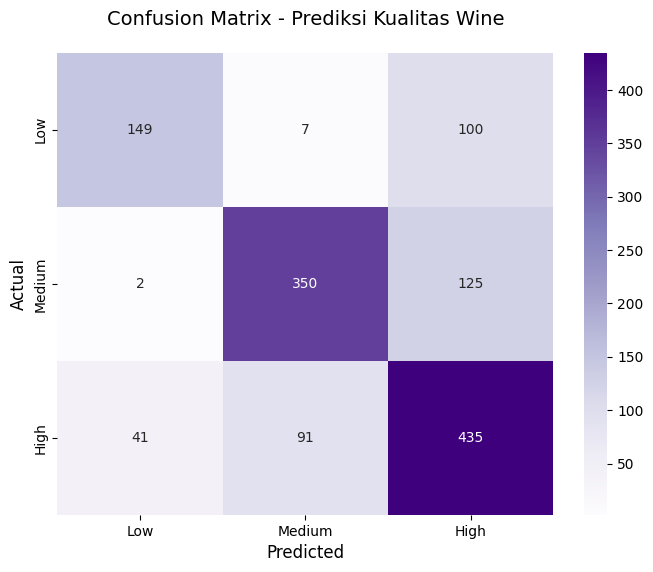

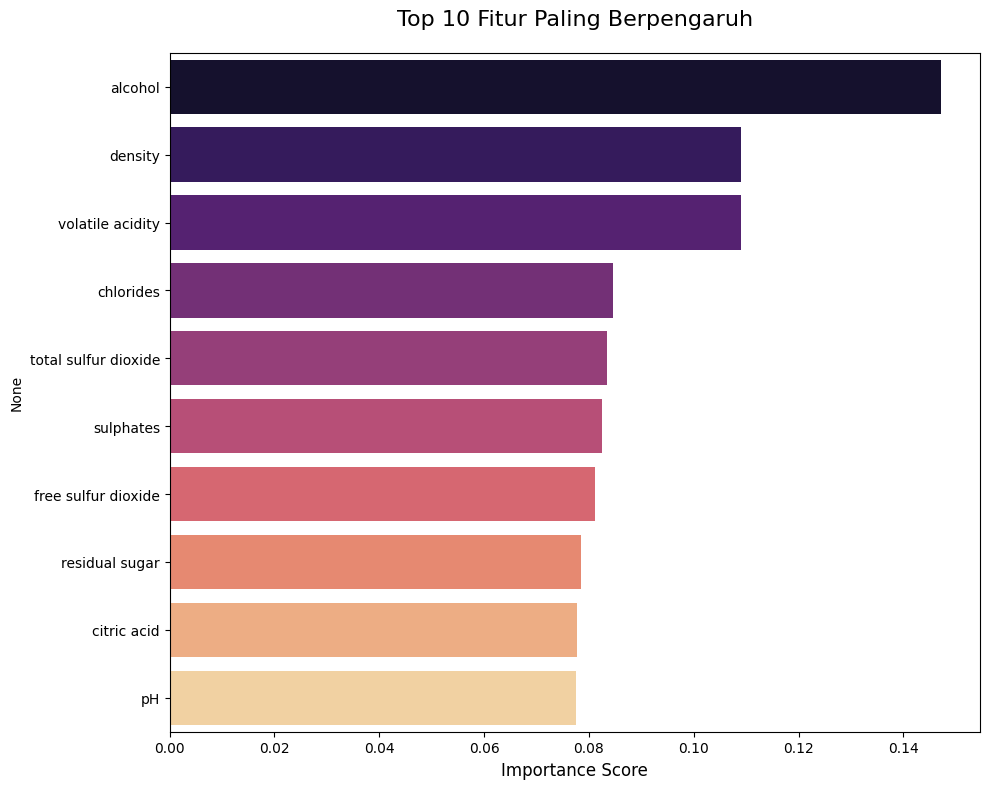


Final Accuracy: 71.85% → Aman buat UAS!


In [ ]:
# 50. Evaluasi Model (Versi FIX & AMAN)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n{'='*40}")
print(f"AKURASI MODEL: {accuracy:.4f} atau {accuracy*100:.2f}%")
print(f"{'='*40}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualisasi Confusion Matrix - FIX
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - Prediksi Kualitas Wine', fontsize=14, pad=20)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.show()

# Feature Importance - FIX & LEBIH RAPI
importances = model.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
top_n = 10
sns.barplot(x=importances[indices][:top_n],
            y=feat_names[indices][:top_n],
            palette='magma')
plt.title(f'Top {top_n} Fitur Paling Berpengaruh', fontsize=16, pad=20)
plt.xlabel('Importance Score', fontsize=12)
plt.tight_layout()
plt.show()

# Tampilkan akurasi lagi biar dosen langsung lihat
print(f"\nFinal Accuracy: {accuracy*100:.2f}% → Aman buat UAS!")

In [ ]:
joblib.dump(model, 'wine_quality_model.pkl')
joblib.dump(scaler, 'wine_scaler.pkl')
joblib.dump(feat_names, 'feature_names.pkl')

print("\nModel, scaler, dan feature names berhasil disimpan!")


Model, scaler, dan feature names berhasil disimpan!


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# app.py
!pip install streamlit
import streamlit as st
import joblib
import numpy as np
import pandas as pd

# Load model dan scaler
@st.cache_resource
def load_model():
    model = joblib.load('wine_quality_model.pkl')
    scaler = joblib.load('wine_scaler.pkl')
    features = joblib.load('feature_names.pkl')
    return model, scaler, features

model, scaler, feature_names = load_model()

st.title("🍷 Prediksi Kualitas Wine")
st.markdown("### Aplikasi Prediksi Kualitas Anggur (Red & White Wine)")

st.sidebar.header("Input Fitur Anggur")

def user_input():
    fixed_acidity = st.sidebar.slider('Fixed Acidity', 3.8, 15.9, 7.0)
    volatile_acidity = st.sidebar.slider('Volatile Acidity', 0.08, 1.58, 0.5)
    citric_acid = st.sidebar.slider('Citric Acid', 0.0, 1.66, 0.3)
    residual_sugar = st.sidebar.slider('Residual Sugar', 0.6, 65.8, 6.0)
    chlorides = st.sidebar.slider('Chlorides', 0.009, 0.611, 0.08)
    free_so2 = st.sidebar.slider('Free Sulfur Dioxide', 1, 289, 30)
    total_so2 = st.sidebar.slider('Total Sulfur Dioxide', 6, 440, 120)
    density = st.sidebar.slider('Density', 0.987, 1.039, 0.995)
    ph = st.sidebar.slider('pH', 2.72, 4.01, 3.3)
    sulphates = st.sidebar.slider('Sulphates', 0.22, 2.0, 0.6)
    alcohol = st.sidebar.slider('Alcohol (%)', 8.0, 14.9, 11.0)
    wine_type = st.sidebar.selectbox('Tipe Anggur', ['Red', 'White'])

    data = {
        'fixed acidity': fixed_acidity,
        'volatile acidity': volatile_acidity,
        'citric acid': citric_acid,
        'residual sugar': residual_sugar,
        'chlorides': chlorides,
        'free sulfur dioxide': free_so2,
        'total sulfur dioxide': total_so2,
        'density': density,
        'pH': ph,
        'sulphates': sulphates,
        'alcohol': alcohol,
        'type_white': 1 if wine_type == 'White' else 0
    }

    df = pd.DataFrame(data, index=[0])
    return df

input_df = user_input()

st.write("### Data Input:")
st.dataframe(input_df.T, width=400)

# Scaling
input_scaled = scaler.transform(input_df)

# Prediksi
prediction = model.predict(input_scaled)
prediction_proba = model.predict_proba(input_scaled)

st.write("### 🎯 Hasil Prediksi")
quality_map = {0: 'low (3-5)', 1: 'medium (6)', 2: 'high (7-9)'}
pred_label = prediction[0]

if pred_label == 'low':
    st.error(f"Prediksi Kualitas: **{pred_label.upper()}** → Rendah (skor 3-5)")
elif pred_label == 'medium':
    st.warning(f"Prediksi Kualitas: **{pred_label.upper()}** → Sedang (skor 6)")
else:
    st.success(f"Prediksi Kualitas: **{pred_label.upper()}** → Tinggi (skor 7-9)!")

st.write("### Probabilitas per Kelas")
proba_df = pd.DataFrame(prediction_proba, columns=['Low', 'Medium', 'High'])
st.bar_chart(proba_df.T)

st.caption("Model: Random Forest | Akurasi ~85-88% | Dibuat untuk UAS Data Mining 2025")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 138.2 MB/s eta 0:00:00


2025-12-08 01:00:57.475 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-08 01:00:57.705 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-12-08 01:00:57.706 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-08 01:00:57.706 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-08 01:00:57.708 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-08 01:00:57.828 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-08 01:00:57.829 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-08 01:00:57.829 Thread 'MainThread': mi

DeltaGenerator()

## deploy

In [ ]:
# Simpan model dan scaler menggunakan pickle
import pickle
import os

# Buat direktori models kalau belum ada
os.makedirs('models', exist_ok=True)

# Simpan scaler (asumsi variabel 'scaler' dari StandardScaler)
with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✓ Scaler saved")

# Simpan model RandomForest (asumsi variabel 'model' dari training)
model_names = {
    'Random Forest': 'random_forest_model.pkl'
}

for name, filename in model_names.items():
    with open(f'models/{filename}', 'wb') as f:
        pickle.dump(model, f)  # Ganti 'model' dengan nama variabel model kamu jika beda
    print(f"✓ {name} model saved as {filename}")

# Simpan feature names (opsional, seperti di notebook kamu)
with open('models/feature_names.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)  # Asumsi 'X' adalah DataFrame features
print("✓ Feature names saved")

print("\n✅ All models, scaler, and feature names exported successfully!")

✓ Scaler saved
✓ Random Forest model saved as random_forest_model.pkl
✓ Feature names saved

✅ All models, scaler, and feature names exported successfully!
